In [229]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import locale

In [269]:
# 設定plt中文字體
font = {'family' : 'DFKai-SB',
'weight' : 'normal',
'size'  : '16'}
plt.rc('font', **font) # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False)

# 預測每年來台旅客人數

In [270]:
#讀入資料
df = pd.read_csv('歷年來台旅客統計.csv')
from sklearn.model_selection import train_test_split

In [271]:
df.head()

,年別,總計人數,總計成長率,總計指數,外籍旅客人數,外籍旅客成長率,外籍旅客占總計百分比,華僑旅客人數,華僑旅客成長率,華僑旅客占總計百分比
0,1956,"14,974",-,0.81,"11,734",-,78.36,"3,240",-,21.64
1,1957,"18,159",21.27,0.98,"14,068",19.89,77.47,"4,091",26.27,22.53
2,1958,"16,709",-7.99,0.90,"15,557",10.58,93.11,"1,152",-71.84,6.89
3,1959,"19,328",15.67,1.04,"17,634",13.35,91.24,"1,694",47.05,8.76
4,1960,"23,636",22.29,1.27,"20,796",17.93,87.98,"2,840",67.65,12.02


In [272]:
# 篩選資料
df = df[['年別','總計人數']]

In [273]:
df.head()

,年別,總計人數
0,1956,"14,974"
1,1957,"18,159"
2,1958,"16,709"
3,1959,"19,328"
4,1960,"23,636"


In [274]:
#更改逗號為整數
locale.setlocale(locale.LC_NUMERIC, '')
df['總計人數'] = df['總計人數'].apply(locale.atoi)

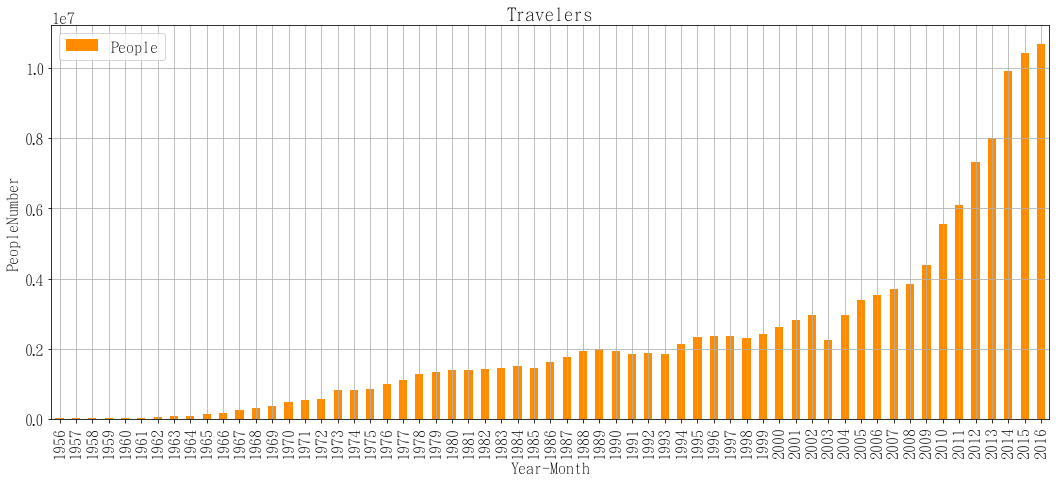

In [275]:
# 畫出每年來台人數的統計圖表
dfp = df.plot.bar(x='年別', y='總計人數', label = 'People', color = 'darkorange',figsize=(15,7))
dfp.set( xlabel= 'Year-Month', ylabel = 'PeopleNumber', title = 'Travelers')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

In [276]:
df.head()

,年別,總計人數
0,1956,14974
1,1957,18159
2,1958,16709
3,1959,19328
4,1960,23636


In [277]:
year = df.年別                                         
number = df.總計人數
x=np.array(year)
y=np.array(number)
# reshape為可以fit的資料型態
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)

In [278]:
# 切割資料
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=31)

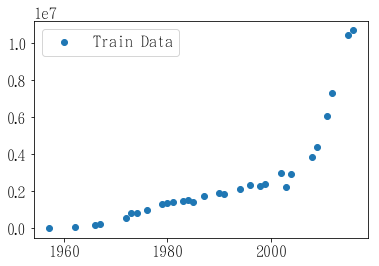

In [279]:
# show出訓練資料
plt.scatter(x_train, y_train, label = 'Train Data')
plt.legend()

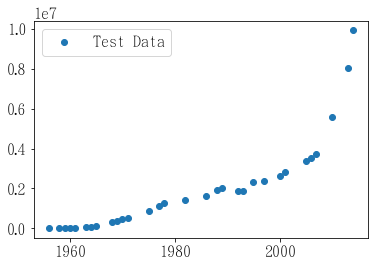

In [280]:
# show出測試資料
plt.scatter(x_test, y_test, label = 'Test Data')
plt.legend()

In [281]:
#製作一個回歸的機器
regr = LinearRegression()
# 訓練
regr.fit(x_train, y_train)
 # 預測
Yp = regr.predict(x_test)

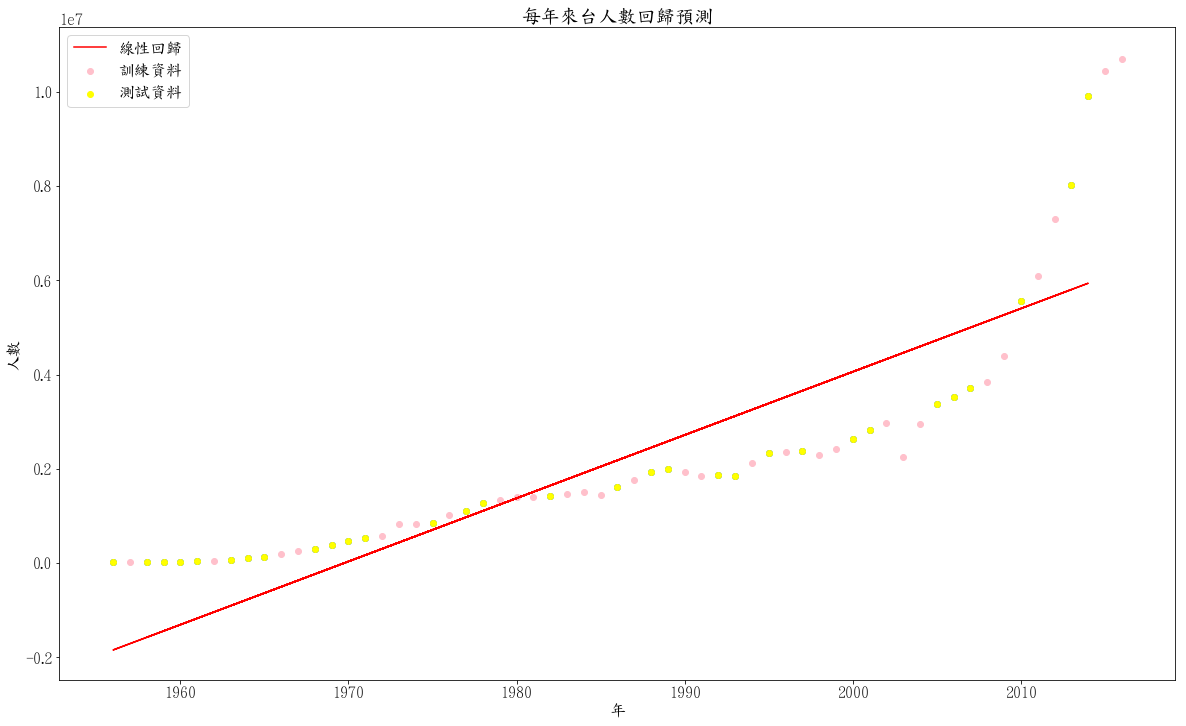

<Figure size 2160x288 with 0 Axes>

In [282]:
#圖畫出來
plt.figure(num=3, figsize=(20, 12))
plt.scatter(x_test, y_test)
plt.scatter(x_train, y_train, label = '訓練資料',color = 'pink')
plt.scatter(x_test, y_test, label = '測試資料',color = 'yellow')
plt.plot(x_test, Yp, 'r',label = '線性回歸')
plt.xlabel('年')
plt.ylabel('人數')
plt.legend()
plt.title('每年來台人數回歸預測')
plt.figure(figsize=(30,4))
plt.show()

## 由此下面可知我們預測的準確率是68%

In [284]:
print('準確率=', regr.score(x_test,y_test))  
print('係數=', regr.coef_)  

準確率= 0.6872172167867714
係數= [134208.26057969]
